In [2]:
import pandas as pd
# Data source : https://www.mcxindia.com/market-data/historical-data#

In [3]:
df = pd.read_csv("Data/oil_data.csv")
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs)
0,FUTCOM,01/01/2009,ENERGY,CRUDEOIL,31027,65539.83
1,FUTCOM,02/01/2009,ENERGY,CRUDEOIL,234853,500131.42
2,FUTCOM,03/01/2009,ENERGY,CRUDEOIL,4908,11188.69
3,FUTCOM,05/01/2009,ENERGY,CRUDEOIL,212593,489154.93
4,FUTCOM,06/01/2009,ENERGY,CRUDEOIL,230727,557364.60


In [4]:
print(df.isnull().sum())
print('\n')
print(df.shape)

Instrument Type          0
Date                     0
Segment                  0
Commodity                0
Traded Contract(Lots)    0
Total Value (Lacs)       0
dtype: int64


(4424, 6)


In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df = df.sort_values(by='Date')
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs)
0,FUTCOM,2009-01-01,ENERGY,CRUDEOIL,31027,65539.83
1,FUTCOM,2009-01-02,ENERGY,CRUDEOIL,234853,500131.42
2,FUTCOM,2009-01-03,ENERGY,CRUDEOIL,4908,11188.69
3,FUTCOM,2009-01-05,ENERGY,CRUDEOIL,212593,489154.93
4,FUTCOM,2009-01-06,ENERGY,CRUDEOIL,230727,557364.60


1. FUTCOM stands for Future contracts of commodities
2. Total value (₹) = Price (₹) x Traded Contracts (measured in lots)
3. For oil, 1 lot = 100 barrels 
4. ∴ per barrel price = price of 1 lot / 100 

In [7]:
df["Price per Barrel"] = (df["Total Value (Lacs)"] * 100000) / (df["Traded Contract(Lots)"] * 100)
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Price per Barrel
0,FUTCOM,2009-01-01,ENERGY,CRUDEOIL,31027,65539.83,2112.348277
1,FUTCOM,2009-01-02,ENERGY,CRUDEOIL,234853,500131.42,2129.550911
2,FUTCOM,2009-01-03,ENERGY,CRUDEOIL,4908,11188.69,2279.684189
3,FUTCOM,2009-01-05,ENERGY,CRUDEOIL,212593,489154.93,2300.898571
4,FUTCOM,2009-01-06,ENERGY,CRUDEOIL,230727,557364.60,2415.688671


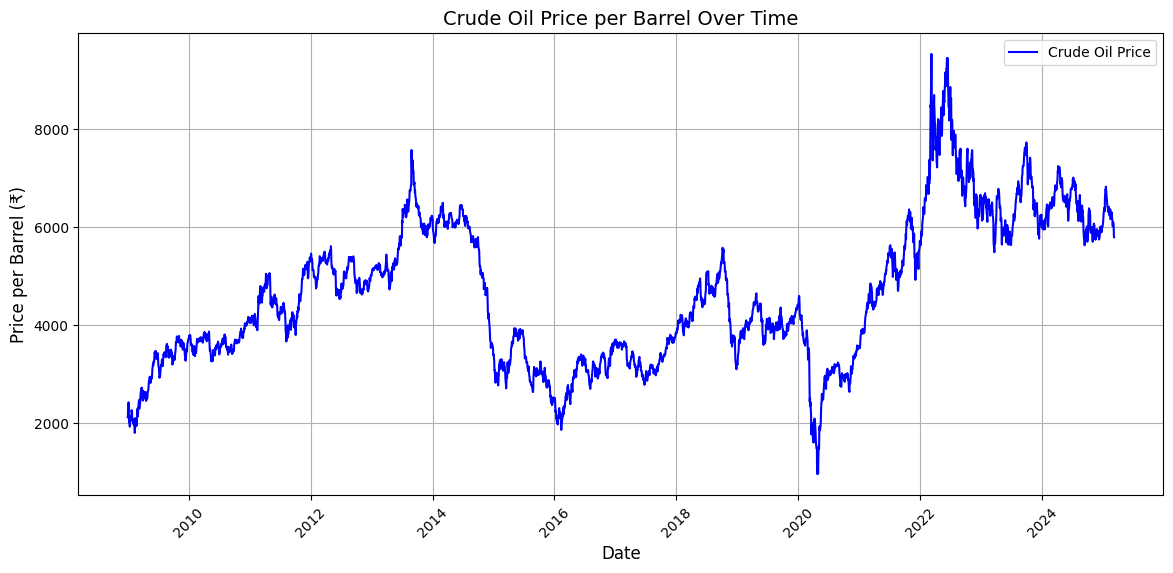

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")

plt.figure(figsize=(14, 6))

sns.lineplot(x=df["Date"], y=df["Price per Barrel"], color="blue", label="Crude Oil Price")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price per Barrel (₹)", fontsize=12)
plt.title("Crude Oil Price per Barrel Over Time", fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.show()

* 2022 Peak - Russian Invasion of Ukraine.
    EU's NATO backing Ukraine implied russia's stoppage of oil export to EU ==> Supply fall ==> Price increase
* 2020 Trough - Covid 19
    Many sectors such as aviation were shut down ==> Fall in demand ==> Price fall
* 2018 Peak - Geopolitical tensions & supply cuts
    US reimposed sanctions on Iran, reducing its oil exports ==> Supply fall ==> Price increase
* 2014 - 2016 Trough - Oil Price Crash of 2014-2016
    OPEC (led by Saudi Arabia) decided not to cut production, leading to an oversupply. US shale oil boom increased global supply ==> Price decrease